In [12]:
#import packages
import numpy as np

%matplotlib inline
import os 
import calendar 
from pathlib import Path
import pandas as pd 
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns 
from sklearn import preprocessing
import matplotlib.pylab as plt

In [13]:
import pandas as pd 
import os


##this makes visualizations from highly correlated variables. 

Glass_df=pd.read_csv(r'C:\Users\Lexus\Desktop\glass.csv')
print(Glass_df)

      ID       RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  \
0      1  1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00   
1      2  1.51761  13.89  3.60  1.36  72.73  0.48   7.83  0.00  0.00   
2      3  1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.00   
3      4  1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.00   
4      5  1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00   
5      6  1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26   
6      7  1.51743  13.30  3.60  1.14  73.09  0.58   8.17  0.00  0.00   
7      8  1.51756  13.15  3.61  1.05  73.24  0.57   8.24  0.00  0.00   
8      9  1.51918  14.04  3.58  1.37  72.08  0.56   8.30  0.00  0.00   
9     10  1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.00  0.11   
10    11  1.51571  12.72  3.46  1.56  73.20  0.67   8.09  0.00  0.24   
11    12  1.51763  12.80  3.66  1.27  73.01  0.60   8.56  0.00  0.00   
12    13  1.51589  12.88  3.43  1.40  73.28  0.69   8.05  0.00  

In [3]:
#find predictor variables 
#understand the distribution and relationship bewteen preditions 

df_slim = Glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]


#these are min max average std Dev 
statistics = pd.DataFrame({
    'Count': df_slim.count(),
    'Mean': df_slim.mean(),
    'Min': df_slim.min(),
    'Max': df_slim.max(),
    'Std Dev': df_slim.std()
})
statistics

,Count,Mean,Min,Max,Std Dev
RI,214,1.518365,1.51115,1.53393,0.003037
Na,214,13.407850,10.73000,17.38000,0.816604
Mg,214,2.684533,0.00000,4.49000,1.442408
Al,214,1.444907,0.29000,3.50000,0.499270
Si,214,72.650935,69.81000,75.41000,0.774546
K,214,0.497056,0.00000,6.21000,0.652192
Ca,214,8.956963,5.43000,16.19000,1.423153
Ba,214,0.175047,0.00000,3.15000,0.497219
Fe,214,0.057009,0.00000,0.51000,0.097439


In [4]:
# These two lines are optional if you want to see ALL columns in data 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# This command gives first five data rows
Glass_df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


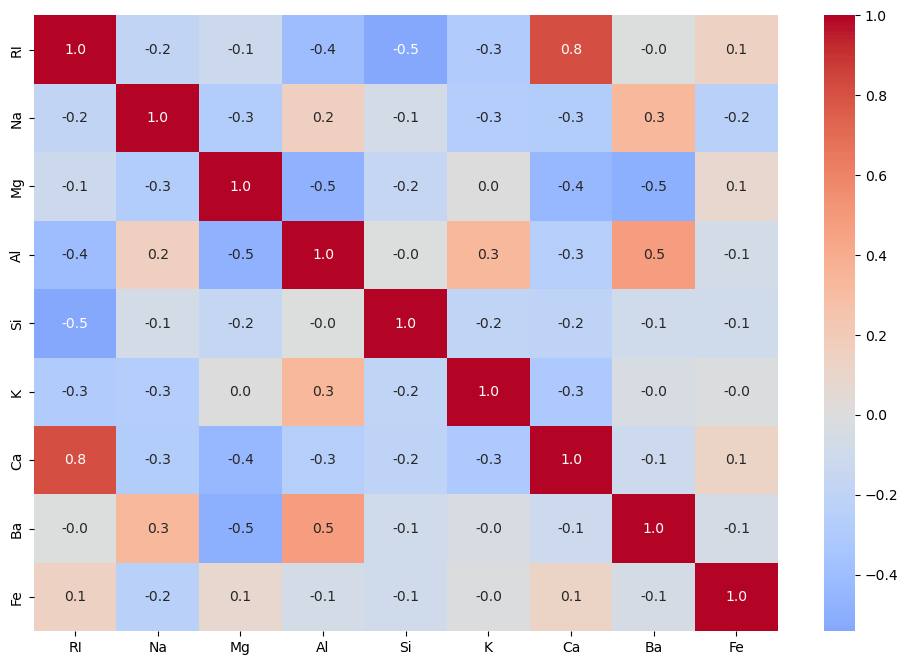

In [5]:
#create slimmed down dataframe -> if created earlier can reuse
df_slim = Glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

#Calculate the correlation between all data fields
corr=df_slim.corr()
#Create a heat map based on the correlation values found
#sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,vmin=-1,vmax=1,cmap="coolwarm")

# The lines below show a version that displays the correlation values in the heat map
fig,ax=plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr,annot=True,fmt=".1f",cmap="coolwarm",center=0,ax=ax)
plt.show()

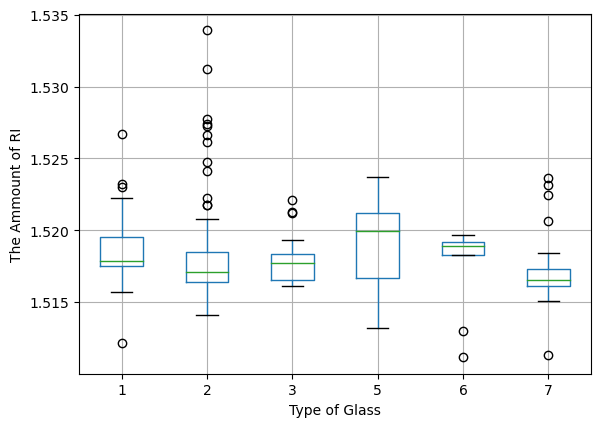

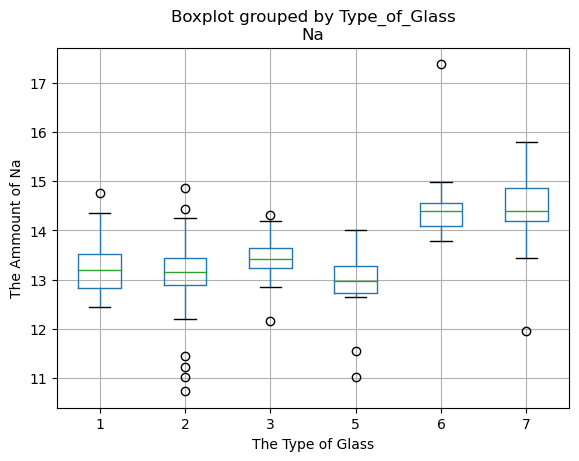

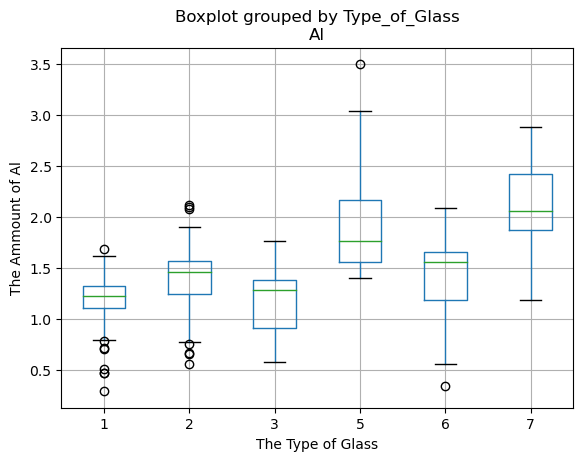

In [6]:
#Box Plot of Lot Area by the general zoning classification
ax=Glass_df.boxplot(column='RI',by='Type_of_Glass')
ax.set_ylabel('The Ammount of RI')
ax.set_xlabel('Type of Glass')
plt.suptitle('')
plt.title('')
plt.show()

# Box Plot of Overall Quality by the general zoning classification
ax=Glass_df.boxplot(column='Na',by='Type_of_Glass')
ax.set_ylabel('The Ammount of Na')
ax.set_xlabel('The Type of Glass')
plt.show()


ax=Glass_df.boxplot(column='Al',by='Type_of_Glass')
ax.set_ylabel('The Ammount of Al')
ax.set_xlabel('The Type of Glass')
plt.show()

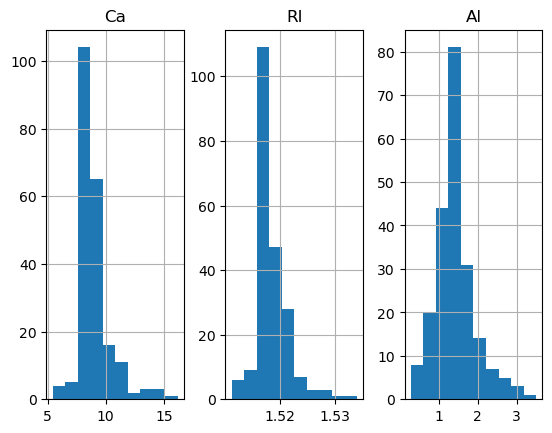

In [7]:
#Histogram? 

import seaborn as sns
#plt.hist(df['LotArea'],color='red')
#plt.hist(df['OverallQual'],color='blue',bins=10, alpha=0.9)
#plt.hist(df['LotArea'],color='red',bins=10,alpha=0.9)


#highest means 
graph=Glass_df.hist(column=['Ca','RI','Al'] ,layout=(1,3))
#the histogram plosts the distribution of numeric valuses as a series of bars
#these are continous values 
#the spread and shape of the values 

#plotting the elements that have the highest means 

#plt.title("Title")
plt.show()
plt.show()
#plt.title("variables(overlapping histogram)")

In [8]:
#####ONEM MORE PREDICTIVE MODEL FOR THIS ONE 

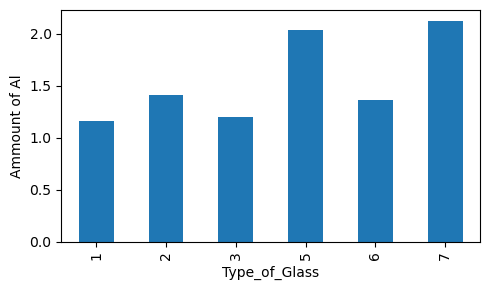

Output:
ID                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_Glass      int64
dtype: object


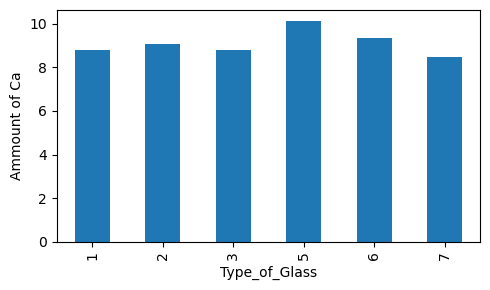

Output:
ID                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_Glass      int64
dtype: object


In [9]:
b=Glass_df.groupby('Type_of_Glass').mean().Al
ax=b.plot(kind='bar',figsize=[5,3])
ax.set_ylabel('Ammount of Al')


plt.tight_layout()
plt.show()

## The code below shows how to view the stored data types for each field in a data frame
result = Glass_df.dtypes

print("Output:")
print(result)


b=Glass_df.groupby('Type_of_Glass').mean().Ca
ax=b.plot(kind='bar',figsize=[5,3])
ax.set_ylabel('Ammount of Ca')


plt.tight_layout()
plt.show()

## The code below shows how to view the stored data types for each field in a data frame
result = Glass_df.dtypes

print("Output:")
print(result)

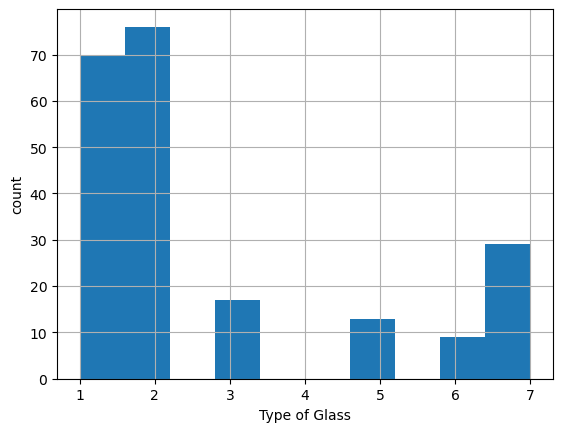

NameError: name 'housing_df' is not defined

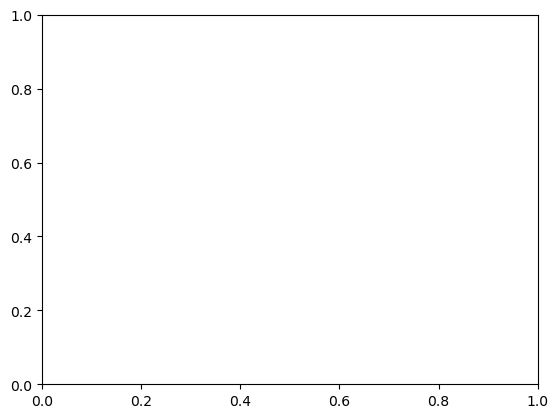

In [10]:
# Histogram of lot Area
ax=Glass_df.Type_of_Glass.hist()
ax.set_xlabel('Type of Glass')
ax.set_ylabel('count')

plt.show()

#Histogram of Overall Quality
fig,ax=plt.subplots()
ax.hist(housing_df.OverallQual,color='black')
ax.set_axisbelow(True)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('count')
plt.show()

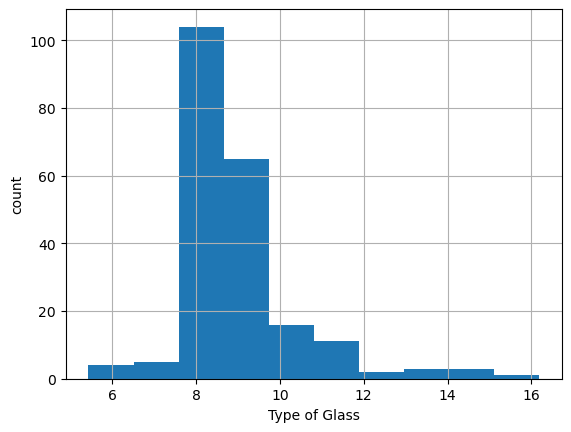

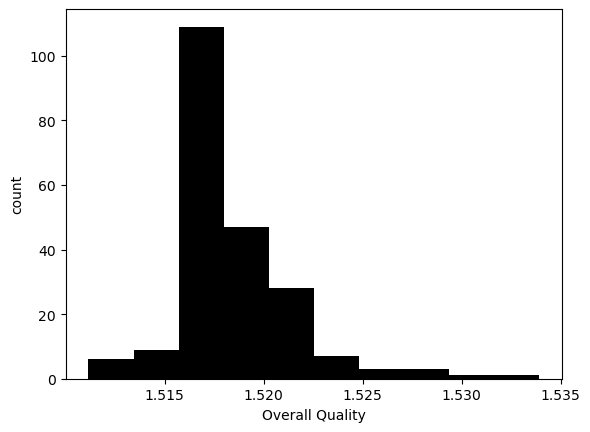

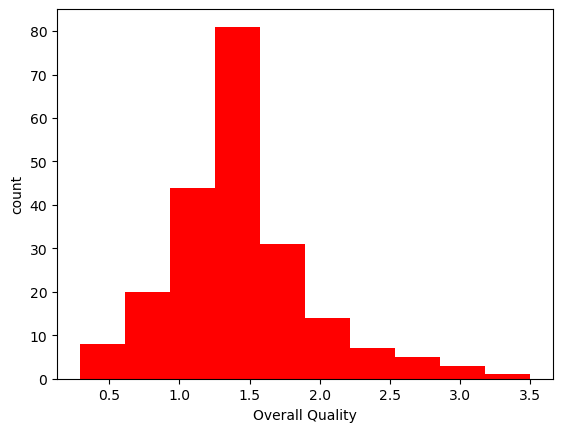

In [14]:
# Histogram of lot Area
ax=Glass_df.Ca.hist()
ax.set_xlabel('Type of Glass')
ax.set_ylabel('count')

plt.show()

#Histogram of Overall Quality
fig,ax=plt.subplots()
ax.hist(Glass_df.RI,color='black')
ax.set_axisbelow(True)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('count')
plt.show()

fig,ax=plt.subplots()
ax.hist(Glass_df.Al,color='red')
ax.set_axisbelow(True)
ax.set_xlabel('Overall Quality')
ax.set_ylabel('count')
plt.show()

In [15]:
import pandas as pd 
import os



###this gets rid of missing variables from a data file


bean_df=pd.read_csv(r'C:\Users\Lexus\Desktop\soybean-large.csv')


bean_df.replace('?',np.nan,inplace=True)


TotalCountperCol=bean_df.isnull().sum().sum

Leaf_spots=bean_df['Leafspots-halo'].isnull().sum()
print('here is the leaf spots',Leaf_spots)

new=bean_df.isnull()
print(new)

new.corr()

here is the leaf spots 25
     Number  Class  Month  Plant-stand  Precipitation   Temp   Hail  \
0     False  False  False        False          False  False  False   
1     False  False  False        False          False  False  False   
2     False  False  False        False          False  False  False   
3     False  False  False        False          False  False  False   
4     False  False  False        False          False  False  False   
5     False  False  False        False          False  False  False   
6     False  False  False        False          False  False  False   
7     False  False  False        False          False  False  False   
8     False  False  False        False          False  False  False   
9     False  False  False        False          False  False  False   
10    False  False  False        False          False  False  False   
11    False  False  False        False          False  False  False   
12    False  False  False        False          Fal

,Number,Class,Month,Plant-stand,Precipitation,Temp,Hail,Crop-Hist,Area-damaged,Severity,Seed-tmt,Germination,Plant-Growth,Leaves,Leafspots-halo,Leafspot-marg,Leafspot-size,Leaf-shread,Leaf-malf,Leaf-mild,Stem,Lodging,Stem-cankers,Canker-lesion,Fruiting-bodies,External-decay,Mycelium,Int-discolor,Sclerotia,Fruit-pods,Fruit-spots,Seed,Mold-growth,Seed-discolor,Seed-size,Shriveling,Roots
Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,1.000000,0.349486,0.296544,0.374241,0.145609,1.000000,1.000000,0.145609,0.145609,0.156846,1.000000,NaN,-0.017021,-0.017021,-0.017021,0.187934,-0.017021,0.173707,1.000000,0.145609,0.296544,0.296544,0.159364,0.296544,0.296544,0.296544,0.296544,0.191997,0.159364,0.176996,0.176996,0.159364,0.176996,0.159364,0.374241
Plant-stand,NaN,NaN,0.349486,1.000000,0.738508,0.933854,0.416637,0.349486,0.349486,0.416637,0.416637,0.448790,0.349486,NaN,0.474610,0.474610,0.474610,0.537744,0.474610,0.497037,0.349486,0.416637,0.738508,0.738508,0.391661,0.738508,0.738508,0.738508,0.738508,0.026056,0.391661,0.017079,0.017079,0.391661,0.017079,0.391661,0.248968
Precipitation,NaN,NaN,0.296544,0.738508,1.000000,0.792388,0.491020,0.296544,0.296544,0.491020,0.491020,0.528913,0.296544,NaN,0.327064,0.327064,0.327064,0.381971,0.327064,0.585774,0.296544,0.491020,1.000000,1.000000,0.537404,1.000000,1.000000,1.000000,1.000000,0.006679,0.537404,0.237339,0.237339,0.537404,0.237339,0.537404,0.087958
Temp,NaN,NaN,0.374241,0.933854,0.792388,1.000000,0.389079,0.374241,0.374241,0.389079,0.389079,0.419104,0.374241,NaN,0.433243,0.433243,0.433243,0.502175,0.433243,0.464160,0.374241,0.389079,0.792388,0.792388,0.425833,0.792388,0.792388,0.792388,0.792388,0.034306,0.425833,0.025276,0.025276,0.425833,0.025276,0.425833,0.122857
Hail,NaN,NaN,0.145609,0.416637,0.491020,0.389079,1.000000,0.145609,0.145609,1.000000,1.000000,0.928358,0.145609,NaN,0.758393,0.758393,0.758393,0.774787,0.758393,0.838242,0.145609,1.000000,0.491020,0.491020,0.913689,0.491020,0.491020,0.491020,0.491020,0.758393,0.913689,0.822670,0.822670,0.913689,0.822670,0.913689,0.389079
Crop-Hist,NaN,NaN,1.000000,0.349486,0.296544,0.374241,0.145609,1.000000,1.000000,0.145609,0.145609,0.156846,1.000000,NaN,-0.017021,-0.017021,-0.017021,0.187934,-0.017021,0.173707,1.000000,0.145609,0.296544,0.296544,0.159364,0.296544,0.296544,0.296544,0.296544,0.191997,0.159364,0.176996,0.176996,0.159364,0.176996,0.159364,0.374241
Area-damaged,NaN,NaN,1.000000,0.349486,0.296544,0.374241,0.145609,1.000000,1.000000,0.145609,0.145609,0.156846,1.000000,NaN,-0.017021,-0.017021,-0.017021,0.187934,-0.017021,0.173707,1.000000,0.145609,0.296544,0.296544,0.159364,0.296544,0.296544,0.296544,0.296544,0.191997,0.159364,0.176996,0.176996,0.159364,0.176996,0.159364,0.374241
Severity,NaN,NaN,0.145609,0.416637,0.491020,0.389079,1.000000,0.145609,0.145609,1.000000,1.000000,0.928358,0.145609,NaN,0.758393,0.758393,0.758393,0.774787,0.758393,0.838242,0.145609,1.000000,0.491020,0.491020,0.913689,0.491020,0.491020,0.491020,0.491020,0.758393,0.913689,0.822670,0.822670,0.913689,0.822670,0.913689,0.389079


In [17]:

#bean_df.info()




#new=bean_df.dropna()
#print(new)
#bean_df.fillna(bean_df.mean(),inplace=True)
#print(bean_df.corr(method='pearson'))
#s="1-2"

bean_df.replace('?',np.nan,inplace=True)

#bean_df.dropna()
#print(bean_df)  # gives NAN values 
#drop all coums with Nan valuse from Data set 


#count number of null variables per collum 



#bean_df.corr(method='pearson')

#total=bean_df.isnull().sum()
#print(total)

#dummies=pd.get_dummies(bean_df['True'])
#Middle=bean_df.median(numeric_only=True)
#Middle=bean_df.fillna(bean_df.median())

#print(Middle)


#Middle.shape #(307,36 col )


#CorrelationMatrix=bean_df.corr()


#plt.figure(figsize=(20,30))
#sns.heatmap(CorrelationMatrix, annot = True)


#bean_df['Leafspots-halo'].isnull().sum()

#bean_df[['Class', 'Precipitation']].isna().sum()
#bean_df[['Class', 'Temp']].isna().sum()

#bean_df['Class'].isna().sum()


In [19]:
#create slimmed down dataframe -> if created earlier can reuse
#df_slim = housing_df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','GrLivArea','TotRmsAbvGrd','SalePrice','OverallQual','OverallCond']]


#plt.sublots()

bean_df.replace("?",np.nan,inplace=True)
print(bean_df)  # gives NAN values 
#drop all coums with Nan valuse from Data set 

new=bean_df.fillna(bean_df.mean())

#new=bean_df.isnull()
print(new)
noCategories=bean_df.select_dtypes(include=['number'])

#matrix=correlation.corr()
plt.figure(figsize=(10, 15))

sns.heatmap(correlation)
plt.title("Matrix of all Numeric Feilds ")
plt.show()


     Number                        Class Month Plant-stand Precipitation Temp  \
0         1        diaporthe-stem-canker     6           0             2    1   
1         1        diaporthe-stem-canker     4           0             2    1   
2         1        diaporthe-stem-canker     3           0             2    1   
3         1        diaporthe-stem-canker     3           0             2    1   
4         1        diaporthe-stem-canker     6           0             2    1   
5         1        diaporthe-stem-canker     5           0             2    1   
6         1        diaporthe-stem-canker     5           0             2    1   
7         1        diaporthe-stem-canker     4           0             2    1   
8         1        diaporthe-stem-canker     6           0             2    1   
9         1        diaporthe-stem-canker     4           0             2    1   
10        2                 charcoal-rot     6           0             0    2   
11        2                 

C:\Users\Lexus\AppData\Local\Temp\ipykernel_4692\3888997628.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new=bean_df.fillna(bean_df.mean())


NameError: name 'correlation' is not defined

<Figure size 1000x1500 with 0 Axes>

In [20]:
import pandas as pd 
import os

House_df=pd.read_csv(r'C:\Users\Lexus\Desktop\HousingPredictiveModel.csv')
print(House_df)

    ActualSalePrices  PredictedSalePrices
0                200                  210
1                250                  240
2                300                  310
3                180                  170
4                210                  220
5                220                  210
6                280                  290
7                290                  300
8                260                  270
9                320                  330
10               300                  290
11               250                  240
12               190                  180
13               270                  280
14               310                  300
15               240                  250
16               220                  230
17               200                  200
18               330                  320
19               280                  300
20               290                  280
21               230                  220
22               220              

In [21]:
##data splitting method that uses something about prediction 


#the objective was to develop a predictive model for classifying music into six categories.
#heavy metal category (7%
#classical category (28%)
#highly corelated 

#n of samples in total 12495
#191 charateristics 
#60 preformers
#15-120 pieces of music -> #20 segments of each piece 
##* calculate the depth 

#idk if a random forest would work here 
#one thing i read at the end is that the variables are dependant of each other
#im not really sure what my train and test variables
#would be if i wrote it 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#import the csv file 

Music_df=pd.read_csv(r'C:\Users\Lexus\Desktop\HousingPredictiveModel.csv')
print(Music_df)
#prints the numeber of rows and colums 
Music_df.shape

pca_Music=PCA(n_components=6)
PrincipalComponents=pca_Music.fit_transfomr(x)
print(PrincipalComponents)




##find the explained variance ratio per each component 
VarRatio = pca.explained_variance_ratio_
#explained_variance_

print(VarRatio)


        

#then to the depth of the tree


    ActualSalePrices  PredictedSalePrices
0                200                  210
1                250                  240
2                300                  310
3                180                  170
4                210                  220
5                220                  210
6                280                  290
7                290                  300
8                260                  270
9                320                  330
10               300                  290
11               250                  240
12               190                  180
13               270                  280
14               310                  300
15               240                  250
16               220                  230
17               200                  200
18               330                  320
19               280                  300
20               290                  280
21               230                  220
22               220              

AttributeError: 'PCA' object has no attribute 'fit_transfomr'

In [ ]:
### this makes a MSE and RMSE calcualtion 

In [23]:
#House_df=pd.get_dummies(House_df,colums=[''])
import math
#data = pd.get_dummies(data,columns=['name'],prefix=['name'])

Diffrence=House_df['ActualSalePrices'].sub(House_df['PredictedSalePrices'])
print(Diffrence)

SquareOfDiffrences=[] 
for i in Diffrence:
    SquareOfDiffrences.append(i**2)
print(SquareOfDiffrences)
Total=sum(SquareOfDiffrences)
print(Total/48) #MSE

RMSE=math.sqrt(Total/48)
print(RMSE)


0    -10
1     10
2    -10
3     10
4    -10
5     10
6    -10
7    -10
8    -10
9    -10
10    10
11    10
12    10
13   -10
14    10
15   -10
16   -10
17     0
18    10
19   -20
20    10
21    10
22    10
23     0
24    10
25   -10
26     0
27     0
28     0
29     0
30     0
31   -10
32   -10
33   -20
34   -10
35    10
36     0
37    10
38     0
39    10
40     0
41   -20
42     0
43     0
44     0
45     0
46   -10
47     0
48     0
dtype: int64
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 0, 100, 400, 100, 100, 100, 0, 100, 100, 0, 0, 0, 0, 0, 100, 100, 400, 100, 100, 0, 100, 0, 100, 0, 400, 0, 0, 0, 0, 100, 0, 0]
87.5
9.354143466934854
